In [1]:
import pandas as pd

# Load the data
ancona_data = pd.read_csv('/content/ancona_data.csv')
athens_data = pd.read_csv('/content/athens_data.csv')

# Add a 'Location' column to differentiate between Ancona and Athens data
ancona_data['Location'] = 'Ancona'
athens_data['Location'] = 'Athens'

# Concatenate both datasets
combined_data = pd.concat([ancona_data, athens_data], ignore_index=True)


In [2]:
# Display basic info about the combined dataset
print("Combined Data Info:")
print(combined_data.info())

# Display first few rows
print("\nFirst few rows of Combined Data:")
print(combined_data.head())

Combined Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595371 entries, 0 to 1595370
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Date                 1595371 non-null  object 
 1   NO2                  1492669 non-null  float64
 2   O3                   1475059 non-null  float64
 3   PM10                 1567512 non-null  float64
 4   PM2.5                1550253 non-null  float64
 5   Latitude             1595371 non-null  float64
 6   Longitude            1595371 non-null  float64
 7   station_name         1595371 non-null  object 
 8   Wind-Speed (U)       1592299 non-null  float64
 9   Wind-Speed (V)       1592299 non-null  float64
 10  Dewpoint Temp        1592299 non-null  float64
 11  Soil Temp            1592299 non-null  float64
 12  Total Percipitation  1592299 non-null  float64
 13  Vegitation (High)    1592299 non-null  float64
 14  Vegitation (Low)     1592299 n

In [5]:
# List of numerical columns
numerical_cols = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)',
                  'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Temp', 'Relative Humidity']  # Changed 'Temperature' to 'Temp'

# Fill missing values with median
for col in numerical_cols:
    combined_data[col].fillna(combined_data[col].median(), inplace=True)

# Verify the change
print(combined_data.columns)  # Print the columns to check if 'Temp' exists

Index(['Date', 'NO2', 'O3', 'PM10', 'PM2.5', 'Latitude', 'Longitude',
       'station_name', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp',
       'Soil Temp', 'Total Percipitation', 'Vegitation (High)',
       'Vegitation (Low)', 'Temp', 'Relative Humidity', 'code', 'id',
       'Location'],
      dtype='object')


In [8]:
# Remove duplicate rows
combined_data.drop_duplicates(inplace=True)


In [9]:
# Convert 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')

# Drop rows with missing dates (if needed)
combined_data.dropna(subset=['Date'], inplace=True)


In [10]:
# Summary statistics
combined_stats = combined_data.describe()
print("Combined Data Statistics:")
print(combined_stats)

Combined Data Statistics:
                                Date           NO2            O3  \
count                        1595371  1.595371e+06  1.595371e+06   
mean   2021-09-27 06:47:50.574931712  1.762154e+01  6.517036e+01   
min              2020-05-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2021-01-15 15:00:00  7.000000e+00  4.683185e+01   
50%              2021-09-24 07:00:00  1.233816e+01  6.600000e+01   
75%              2022-04-05 13:00:00  2.296270e+01  8.455508e+01   
max              2023-10-31 23:00:00  3.120000e+02  3.030000e+02   
std                              NaN  1.599920e+01  2.933225e+01   

               PM10         PM2.5      Latitude     Longitude  Wind-Speed (U)  \
count  1.595371e+06  1.595371e+06  1.595371e+06  1.595371e+06    1.595371e+06   
mean   2.162726e+01  1.435514e+01  3.945620e+01  2.102565e+01    2.211700e-01   
min    0.000000e+00  0.000000e+00  3.781387e+01  1.315000e+01   -5.614838e+00   
25%    1.200000e+01  8.000000e+00  3.

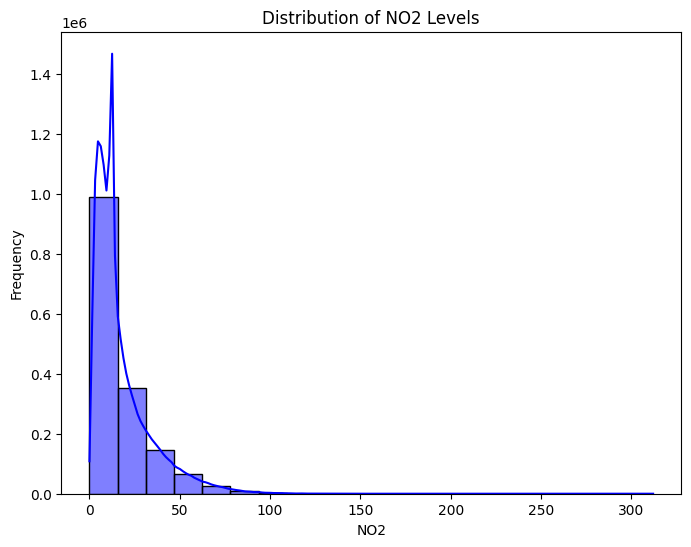

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for NO2
plt.figure(figsize=(8, 6))
sns.histplot(combined_data['NO2'], bins=20, kde=True, color='blue')
plt.title('Distribution of NO2 Levels')
plt.xlabel('NO2')
plt.ylabel('Frequency')
plt.show()


<ipython-input-17-73d33762dea5>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


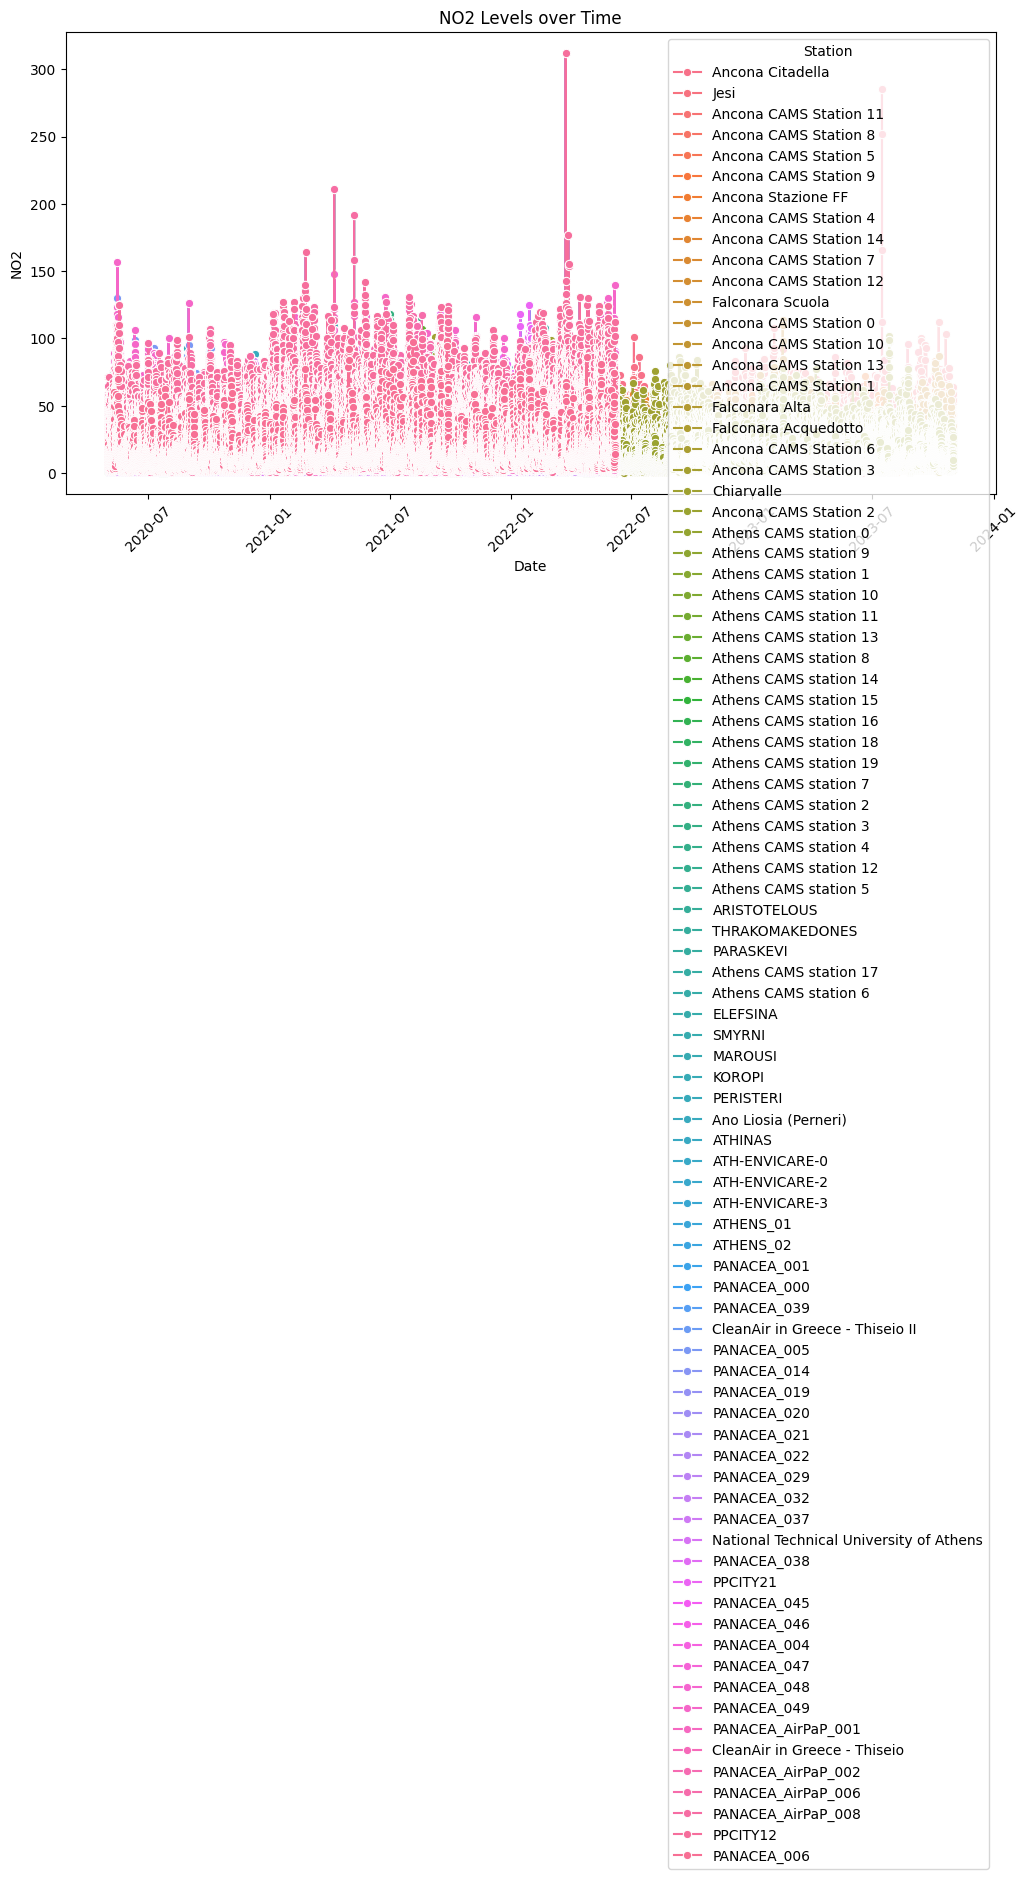

In [17]:
# Example: Line plot for NO2 over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='NO2', data=combined_data, hue='station_name', marker='o')
plt.title('NO2 Levels over Time')
plt.xlabel('Date')
plt.ylabel('NO2')
plt.xticks(rotation=45)
plt.legend(title='Station')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


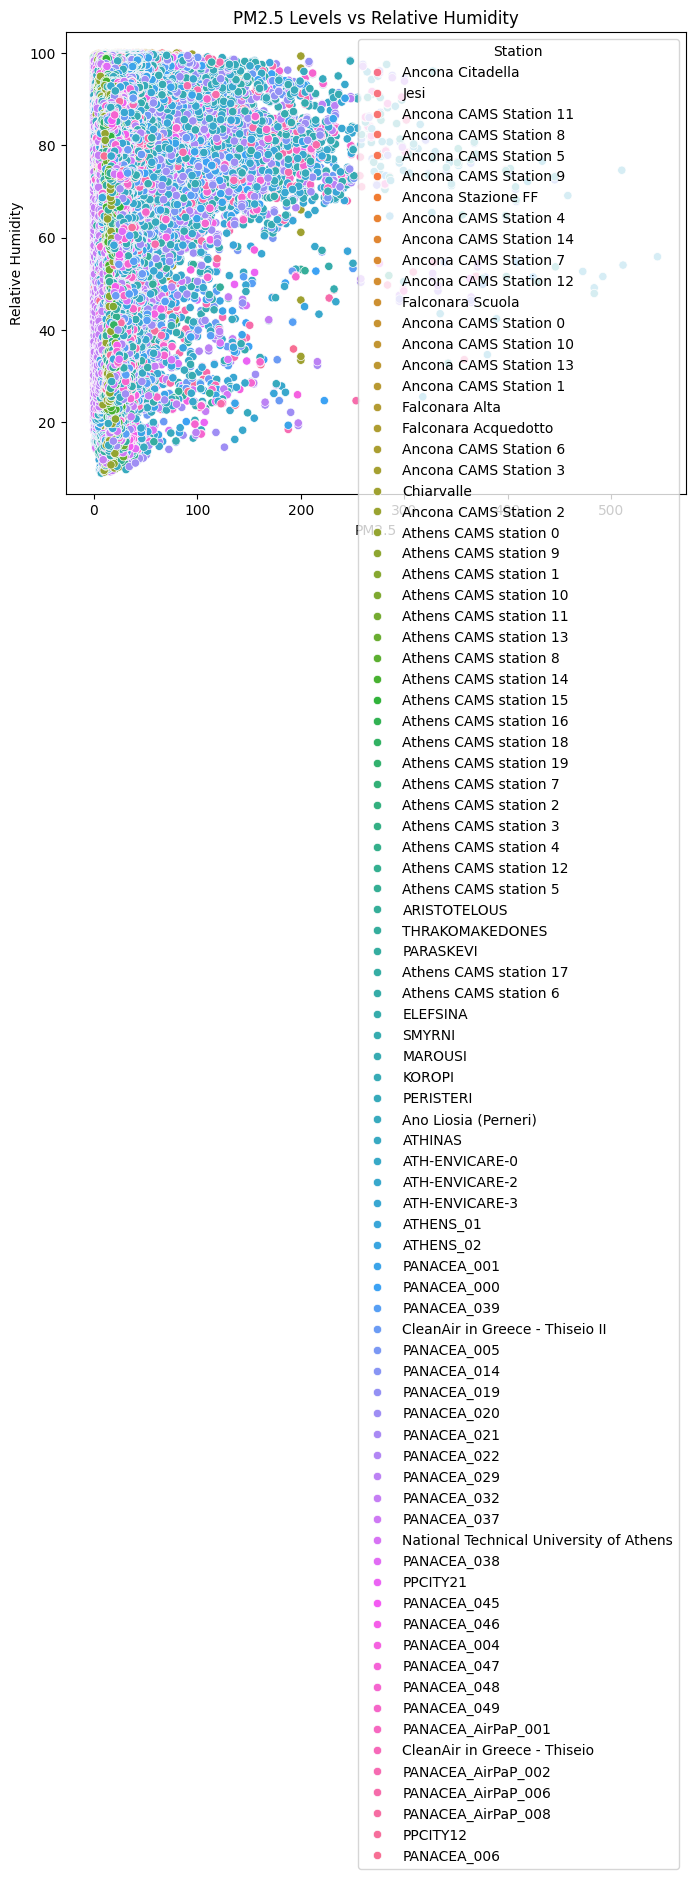

In [18]:
# Example: Scatter plot for PM2.5 vs Relative Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=combined_data['PM2.5'], y=combined_data['Relative Humidity'], hue=combined_data['station_name'])
plt.title('PM2.5 Levels vs Relative Humidity')
plt.xlabel('PM2.5')
plt.ylabel('Relative Humidity')
plt.legend(title='Station')
plt.show()


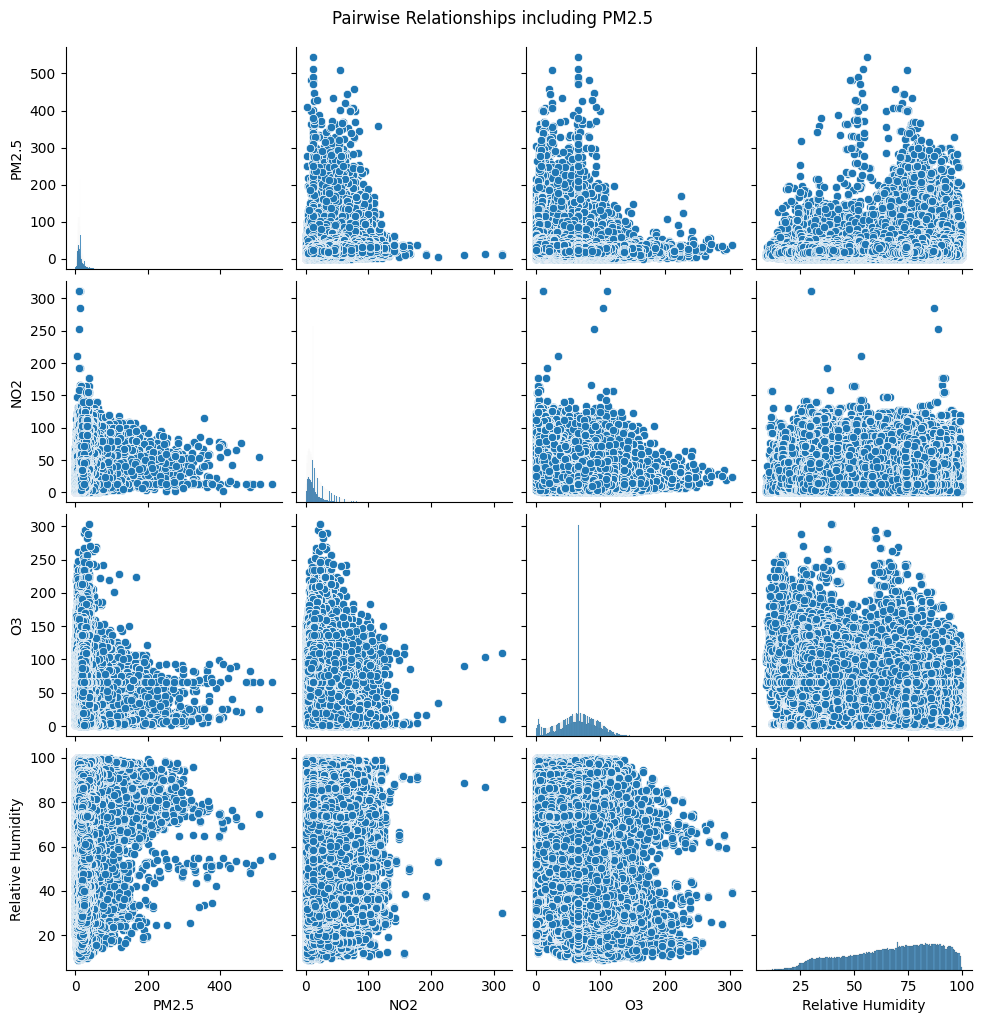

In [19]:
# Example: Pair plot for selected variables including PM2.5
sns.pairplot(combined_data[['PM2.5', 'NO2', 'O3', 'Relative Humidity']])
plt.suptitle('Pairwise Relationships including PM2.5', y=1.02)
plt.show()

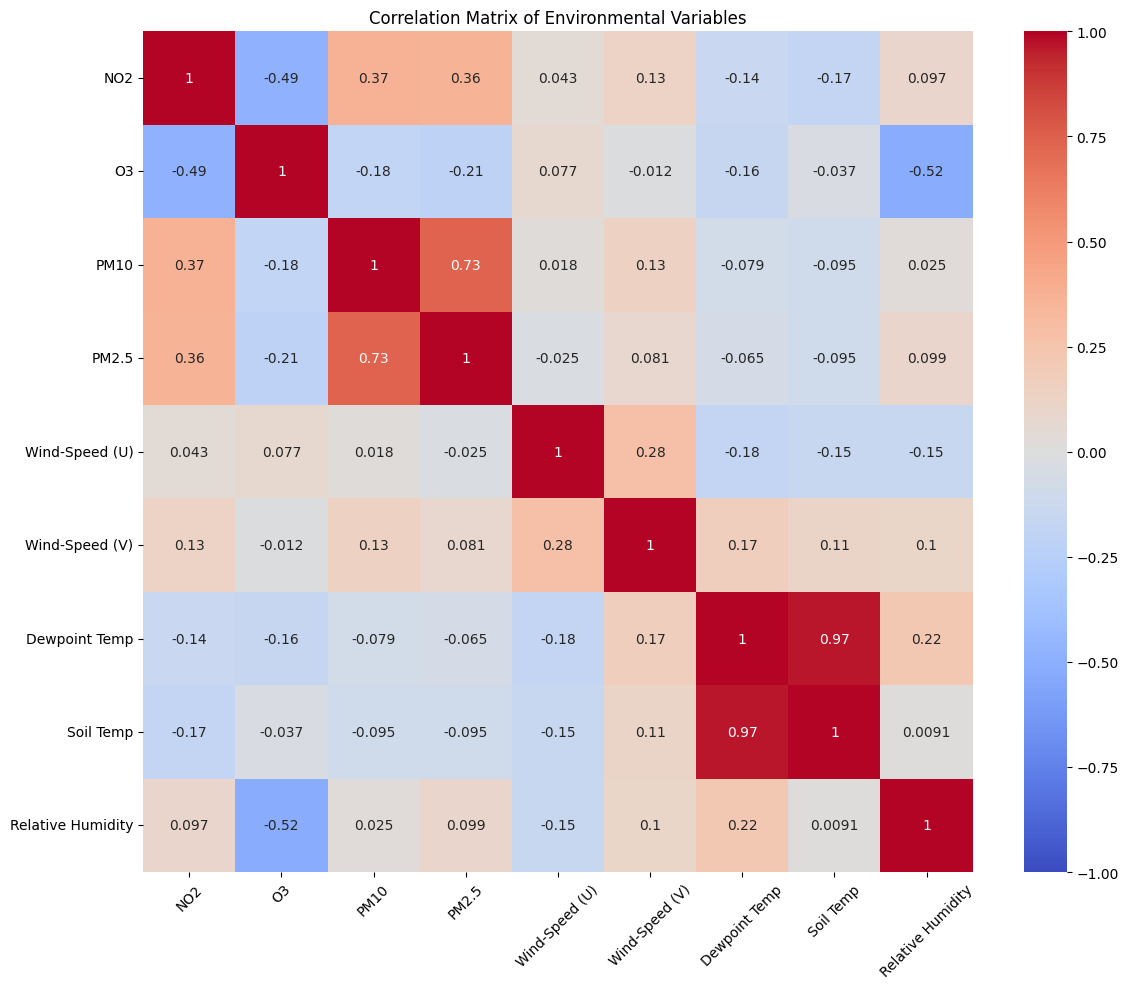

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical variables for correlation matrix
numerical_vars = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)',
                  'Dewpoint Temp', 'Soil Temp',  'Relative Humidity']

# Calculate correlation matrix
corr_matrix = combined_data[numerical_vars].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Environmental Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
